In [1]:
import pandas as pd
df = pd.read_csv("10 pipe dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [2]:
!pip install imbalanced-learn


In [3]:
df.shape

(12316, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

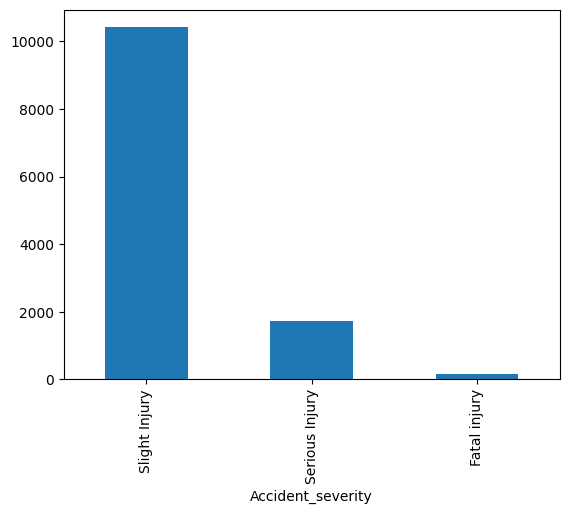

In [5]:
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Educational_level'>

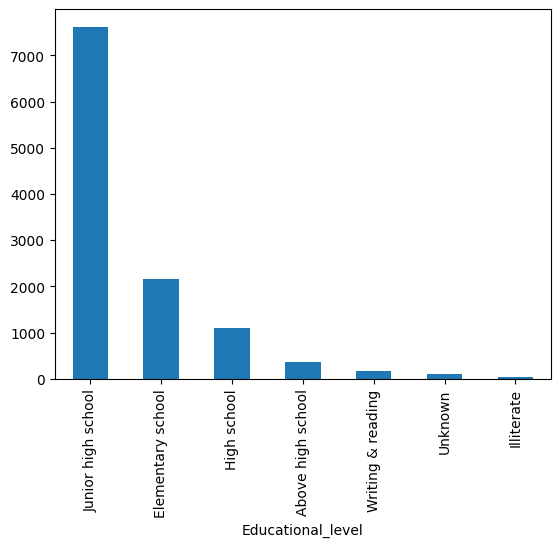

In [6]:
df['Educational_level'].value_counts().plot(kind='bar')

In [7]:
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\Geetanjali Kumari\AppData\Local\Temp\ipykernel_51424\2145562215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [8]:
df['Time'] = pd.to_datetime(df['Time'])

new_df = df.copy()
df['Hour_of_Day'] = df['Time'].dt.hour
new_df.drop('Time',axis=1,inplace=True)
new_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['Accident_severity'] = lb.fit_transform(new_df['Accident_severity'])

new_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,2
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,2


In [10]:
new_df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

In [11]:
from imblearn.over_sampling import RandomOverSampler

X = new_df.drop(columns=['Accident_severity'])
y = new_df['Accident_severity'] 

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [12]:
y_resampled.value_counts(), X_resampled.shape

(Accident_severity
 2    10415
 1    10415
 0    10415
 Name: count, dtype: int64,
 (31245, 30))

In [13]:
 # train/test/split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size=0.2,
                                                random_state=42)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the strategies for each column
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the object columns indices
object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')

# Apply the transformation
X_train_encoded = tf2.fit_transform(X_train)
X_train_encoded.shape

(24996, 234)

In [17]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2

tf4 = SelectKBest(chi2, k=50)

In [18]:
# import the necessary liabrary
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


tf5 = RandomForestClassifier()

In [19]:
# Construct the pipeline
from sklearn.pipeline import Pipeline
 
pipe = Pipeline([
    ('trf1', tf1),
    ('trf2', tf2),
    ('trf4', tf4),
    ('trf5', tf5)
])

# Train the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(stra...
                                                                sparse_output=False),
                                                  [26]),
                                                 ('ohe_27',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [27]),
                                                 ('ohe_28',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [28]),
                                                 ('ohe_29',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [29])])),
                ('trf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x00000248B47A0D60>)),
                ('trf5', RandomForestClassifier())])

In [20]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([1, 2, 2, ..., 0, 1, 2])

In [21]:
# Code here
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_educational_level',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_Vehicle_driver_relation',
                                  SimpleImputer(strategy='most_frequent'), [4]),
                                 ('impute_Driving_experience',
                                  SimpleImputer(strategy='most_frequent'), [5]),
                                 ('impute_Type_of_vehicle',
                                  SimpleImputer(strategy='most_frequent'), [6...
                                 ('impute_Road_surface_type',
                                  SimpleImputer(strategy='most_frequent'),
                                  [14]),
                                 ('impute_Type_of_collision',
                                  SimpleImputer(strategy='most_frequent'),
                                  [18]),
               

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9411105776924308

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2085
           1       0.88      0.97      0.92      2100
           2       0.97      0.86      0.91      2064

    accuracy                           0.94      6249
   macro avg       0.94      0.94      0.94      6249
weighted avg       0.94      0.94      0.94      6249



In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2085,    0,    0],
       [  15, 2030,   55],
       [  26,  272, 1766]], dtype=int64)

In [25]:
import pickle 
pickle.dump(pipe,open("10 pipe.pkl",'wb'))

In [26]:
pipe = pickle.load(open("10 pipe.pkl",'rb'))

In [30]:
import numpy as np

# Check the shape and columns of X_train
print("X_train shape:", X_train.shape)
print("X_train columns:", X_train.columns.tolist())

# Adjust the input array to match the correct number of features
input_data = np.array(['Thursday', '31-50', 'Male', 'Junior high school', 'Owner', 'Unknown', 
                       'Long lorry', 'Owner', 'Unknown', 'Unknown', 'Other', 
                       'Two-way (divided with solid lines road marking)', 
                       'Tangent road with flat terrain', 'Unknown', 'Unknown', 'Dry', 
                       'Daylight', 'Normal', 'Collision with animals', 2, 1, 
                       'Going straight', 'Driver or rider', 'Male', '18-30', 3, 
                       'Driver', 'Normal', 'Not a Pedestrian', 
                       'Changing lane to the left'], dtype=object).reshape(1, -1)

# Print the input shape
print("Input shape:", input_data.shape)

# Make the prediction
print("Prediction:", pipe.predict(input_data))

# Actual value check
print("Actual:", y_test.iloc[10] if len(y_test) > 10 else "y_test has fewer than 11 elements.")


X_train shape: (24996, 30)
X_train columns: ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident']
Input shape: (1, 30)
Prediction: [2]
Actual: 1


C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarnin

In [33]:
def pred(Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident, Hour_of_Day):
    
    # Your prediction code here
    features = np.array([[Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation,
         Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle,
         Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment,
         Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions,
         Weather_conditions, Type_of_collision, Number_of_vehicles_involved,
         Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty,
         Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality,
         Pedestrian_movement, Cause_of_accident]])
    
    results = pipe.predict(features)
    return results

In [36]:
predicted_class = pred(Day_of_week="Thursday", 
                                Age_band_of_driver='31-50',
                                Sex_of_driver='Male',
                                Educational_level='Junior high school',
                                Vehicle_driver_relation='Owner',
                                Driving_experience=None,
                                Type_of_vehicle='Long lorry',
                                Owner_of_vehicle='Owner',
                                Service_year_of_vehicle='Unknown',
                                Defect_of_vehicle=None,
                                Area_accident_occured='Other',
                                Lanes_or_Medians='Two-way (divided with solid lines road marking)',
                                Road_allignment='Tangent road with flat terrain',
                                Types_of_Junction=None,
                                Road_surface_type=None,
                                Road_surface_conditions='Dry',
                                Light_conditions='Daylight',
                                Weather_conditions='Normal',
                                Type_of_collision='Collision with animals',
                                Number_of_vehicles_involved=2,
                                Number_of_casualties=1,
                                Vehicle_movement='Going straight',
                                Casualty_class='Driver or rider',
                                Sex_of_casualty='Male',
                                Age_band_of_casualty='18-30',
                                Casualty_severity=3,
                                Work_of_casuality='Driver',
                                Fitness_of_casuality='Normal',
                                Pedestrian_movement='Not a Pedestrian',
                                Cause_of_accident='Changing lane to the left',
                                Hour_of_Day=12)

if predicted_class[0] == 2:
    print("Slight Injury.....")
elif predicted_class[0] == 1:
    print("Serious Injury")
else:
    print("Fatal Injury")

Slight Injury.....


C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Geetanjali Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarnin

In [ ]:
# test 2
predicted_class = pred(Day_of_week="Friday", 
                       Age_band_of_driver='31-50',
                       Sex_of_driver='Male',
                       Educational_level='Elementary school',
                       Vehicle_driver_relation='Employee',
                       Driving_experience='1-2yr',
                       Type_of_vehicle='Lorry (41?100Q)',
                       Owner_of_vehicle='Owner',
                       Service_year_of_vehicle=None,
                       Defect_of_vehicle='No defect',
                       Area_accident_occured='Office areas',
                       Lanes_or_Medians='Two-way (divided with broken lines road marking)',
                       Road_allignment='Tangent road with flat terrain',
                       Types_of_Junction='Y Shape',
                       Road_surface_type='Asphalt roads',
                       Road_surface_conditions='Dry',
                       Light_conditions='Daylight',
                       Weather_conditions='Normal',
                       Type_of_collision='Vehicle with vehicle collision',
                       Number_of_vehicles_involved=2,
                       Number_of_casualties=2,
                       Vehicle_movement='Going straight',
                       Casualty_class='na',
                       Sex_of_casualty='na',
                       Age_band_of_casualty='na',
                       Casualty_severity='na',
                       Work_of_casuality='Driver',
                       Fitness_of_casuality='Normal',
                       Pedestrian_movement='Not a Pedestria